<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preamble" data-toc-modified-id="Preamble-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preamble</a></span><ul class="toc-item"><li><span><a href="#General-Parameters" data-toc-modified-id="General-Parameters-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>General Parameters</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Ending-site" data-toc-modified-id="Ending-site-1.2.0.1"><span class="toc-item-num">1.2.0.1&nbsp;&nbsp;</span>Ending site</a></span></li><li><span><a href="#Calculate-finishing-point" data-toc-modified-id="Calculate-finishing-point-1.2.0.2"><span class="toc-item-num">1.2.0.2&nbsp;&nbsp;</span>Calculate finishing point</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Tau_z-asymmetry-effects" data-toc-modified-id="Tau_z-asymmetry-effects-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tau_z asymmetry effects</a></span><ul class="toc-item"><li><span><a href="#An-example" data-toc-modified-id="An-example-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>An example</a></span></li><li><span><a href="#Systematic" data-toc-modified-id="Systematic-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Systematic</a></span><ul class="toc-item"><li><span><a href="#An-example" data-toc-modified-id="An-example-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>An example</a></span></li><li><span><a href="#Find-the-rate-for-one" data-toc-modified-id="Find-the-rate-for-one-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Find the rate for one</a></span></li><li><span><a href="#An-example-with-asymmetry" data-toc-modified-id="An-example-with-asymmetry-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>An example with asymmetry</a></span></li><li><span><a href="#Systematic-asymmetry" data-toc-modified-id="Systematic-asymmetry-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Systematic asymmetry</a></span></li><li><span><a href="#Systematic-asymmetry-different-levels-of-noise" data-toc-modified-id="Systematic-asymmetry-different-levels-of-noise-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Systematic asymmetry different levels of noise</a></span></li></ul></li></ul></li><li><span><a href="#Graph" data-toc-modified-id="Graph-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Graph</a></span><ul class="toc-item"><li><span><a href="#Let's-get-to-examples-of-going-right-and-going-left" data-toc-modified-id="Let's-get-to-examples-of-going-right-and-going-left-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Let's get to examples of going right and going left</a></span></li><li><span><a href="#Plot-and-save" data-toc-modified-id="Plot-and-save-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Plot and save</a></span></li></ul></li></ul></div>

# Preamble

In [1]:
import  pprint
import  subprocess 
import sys 
sys.path.append('../')

import numpy as np
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=5)

from network import Protocol, NetworkManager, Network
from patterns_representation import PatternsRepresentation
from analysis_functions import calculate_persistence_time, calculate_recall_quantities, calculate_triad_connectivity
from plotting_functions import plot_weight_matrix, plot_network_activity_angle, plot_persistent_matrix

## General Parameters

In [2]:
epsilon = 10e-80
vmin = -3.0
remove = 0.010
dt = 0.001

sns.set(font_scale=3.5)
sns.set_style("whitegrid", {'axes.grid': False})
plt.rcParams['figure.figsize'] = (12, 8)
lw = 10
ms = 22
alpha_graph = 0.3
colors = sns.color_palette()

## Functions

#### Ending site

In [3]:
def ending_side(pattern_sequence):
    for x in pattern_sequence:
        if x == 9:
            return 1.0
        if x == 0:
            return 0.0
    return np.NAN

#### Calculate finishing point

In [4]:
from analysis_functions import calculate_angle_from_history, calculate_winning_pattern_from_distances 
from analysis_functions import calculate_patterns_timings
import itertools

def return_ending_side(tau_z_pre=0.025, tau_z_post=0.25, tt=0.100, ipi=0.0, sigma_out=0.0, T_persistence=0.100):
    
    strict_maximum = True

    g_a = 2.0
    g_I = 2.0
    tau_a = 0.250
    G = 1.0
    sigma_out = sigma_out
    tau_s = 0.010
    tau_z_pre = tau_z_pre
    tau_z_post = tau_z_post

    hypercolumns = 1
    minicolumns = 10
    n_patterns = 10

    # Training protocol
    training_times_base = tt
    training_times = [training_times_base for i in range(n_patterns)]
    ipi_base = ipi
    inter_pulse_intervals = [ipi_base for i in range(n_patterns)]
    inter_sequence_interval = 0.0
    resting_time = 0.0
    epochs = 1

    # Manager properties
    values_to_save = ['o']

    # Neural Network
    nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
                     tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
                     strict_maximum=strict_maximum, perfect=False, normalized_currents=True)


    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)
    # Build the representation
    representation = PatternsRepresentation(manager.canonical_activity_representation[:n_patterns],
                                            minicolumns=minicolumns)

    # Build the protocol
    protocol = Protocol()
    protocol.simple_protocol(representation, training_times=training_times, inter_pulse_intervals=inter_pulse_intervals,
                        inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

    # Run the protocol
    timed_input = manager.run_network_protocol_offline(protocol=protocol)

    T_persistence = T_persistence
    manager.set_persistent_time_with_adaptation_gain(T_persistence=T_persistence)

    T_cue = tau_s
    T_recall = T_persistence * (n_patterns + 1) * 0.5 
    nr = manager.canonical_network_representation
    manager.run_network_recall(I_cue=nr[5], T_cue=T_cue, T_recall=T_recall, reset=True, empty_history=True)


    distances = calculate_angle_from_history(manager)
    winning = calculate_winning_pattern_from_distances(distances)
    timings = calculate_patterns_timings(winning, manager.dt, remove=remove)

    # Get the element of the sequence without consecutive duplicates
    aux = [x[0] for x in timings]
    pattern_sequence = [i for i, x in itertools.groupby(aux)]
    
    result = ending_side(pattern_sequence)
    
    return result, manager, pattern_sequence

# Tau_z asymmetry effects

## An example

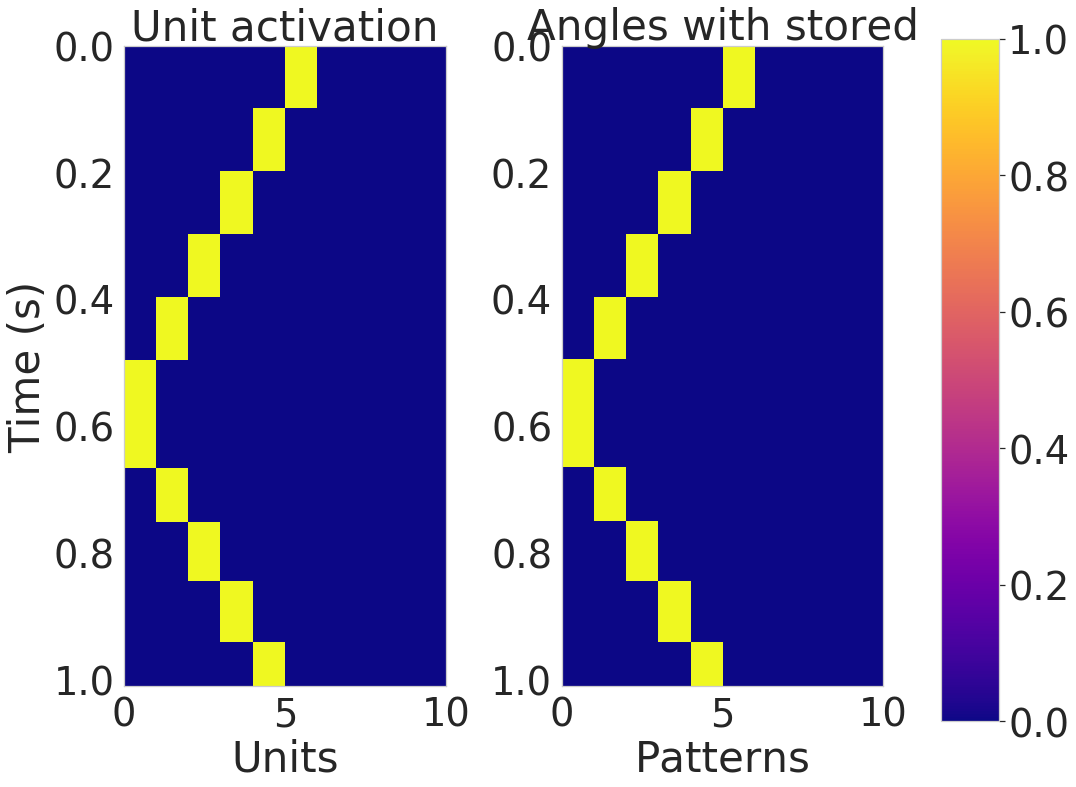

In [5]:
strict_maximum = True

g_a = 2.0
g_I = 2.0
tau_a = 0.250
G = 1.0
sigma_out = 0.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.025

hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Training protocol
training_times_base = 0.100
training_times = [training_times_base for i in range(n_patterns)]
ipi_base = 0.00
inter_pulse_intervals = [ipi_base for i in range(n_patterns)]
inter_sequence_interval = 0.0
resting_time = 0.0
epochs = 1

# Manager properties
values_to_save = ['o']

# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
                 tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
                 strict_maximum=strict_maximum, perfect=False, normalized_currents=True)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)
# Build the representation
representation = PatternsRepresentation(manager.canonical_activity_representation[:n_patterns],
                                        minicolumns=minicolumns)

# Build the protocol
protocol = Protocol()
protocol.simple_protocol(representation, training_times=training_times, inter_pulse_intervals=inter_pulse_intervals,
                    inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

# Run the protocol
timed_input = manager.run_network_protocol_offline(protocol=protocol)

T_persistence = 0.100
manager.set_persistent_time_with_adaptation_gain(T_persistence=T_persistence)

T_cue = tau_s
T_recall = T_persistence * n_patterns
nr = manager.canonical_network_representation
manager.run_network_recall(I_cue=nr[5], T_cue=T_cue, T_recall=T_recall, reset=True, empty_history=True)
plot_network_activity_angle(manager);

In [6]:
distances = calculate_angle_from_history(manager)
winning = calculate_winning_pattern_from_distances(distances)
timings = calculate_patterns_timings(winning, manager.dt, remove=remove)

# Get the element of the sequence without consecutive duplicates
aux = [x[0] for x in timings]
pattern_sequence = [i for i, x in itertools.groupby(aux)]
print(pattern_sequence)

[5, 4, 3, 2, 1, 0, 1, 2, 3, 4]


## Systematic

### An example

0.0


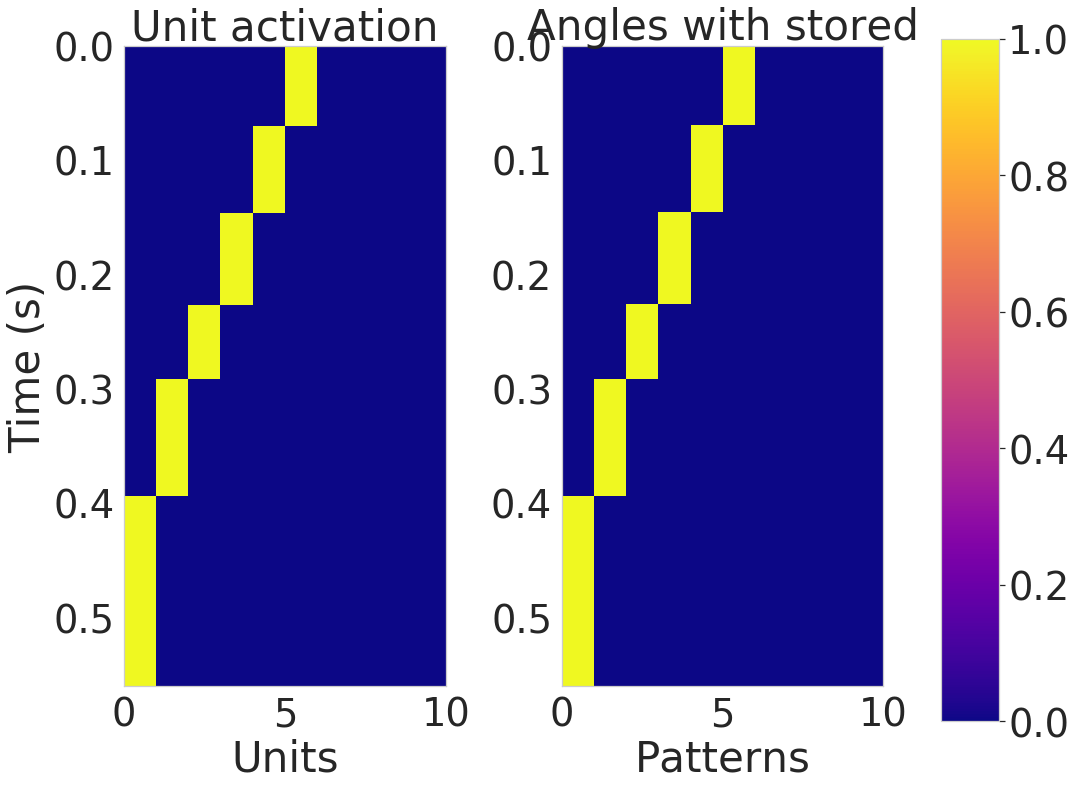

In [7]:
tau_z_pre = 0.025
tau_z_post = 0.025
training_time = 0.100
ipi = 0.0
sigma_out = 0.1

aux = return_ending_side(tau_z_pre=tau_z_pre, tau_z_post=tau_z_post, tt=training_time, ipi=ipi, sigma_out=sigma_out)
result, manager, pattern_sequence = aux
print(result)
plot_network_activity_angle(manager);

### Find the rate for one 

In [8]:
%%time
tau_z_pre = 0.025
tau_z_post = 0.025
training_time = 0.100
ipi = 0.0
sigma_out = 0.1
n_samples = 100
results = np.zeros(n_samples)

for sample_index in range(n_samples):
    aux = return_ending_side(tau_z_pre=tau_z_pre, tau_z_post=tau_z_post, tt=training_time, ipi=ipi, sigma_out=sigma_out)
    result, manager, pattern_sequence = aux
    results[sample_index] = result
    
print(np.mean(results))

0.43
CPU times: user 7.73 s, sys: 28 ms, total: 7.76 s
Wall time: 7.34 s


### An example with asymmetry

In [9]:
training_time = 0.100
ipi = 0.0
sigma_out = 0.1
n_samples = 100

asymmetry = -0.010
tau_z_pre = 0.025 + asymmetry * 0.5
tau_z_post = 0.025 - asymmetry * 0.5
print('tau_z_pre', tau_z_pre)
print('tau_z_post', tau_z_post)


for sample_index in range(n_samples):
    aux = return_ending_side(tau_z_pre=tau_z_pre, tau_z_post=tau_z_post, tt=training_time, ipi=ipi, sigma_out=sigma_out)
    result, manager, pattern_sequence = aux
    results[sample_index] = result
    
print(np.mean(results))

tau_z_pre 0.02
tau_z_post 0.030000000000000002
0.0


### Systematic asymmetry

In [10]:
%%time
training_time = 0.100
ipi = 0.0
sigma_out = 0.1
n_samples = 500

asymmetry = -0.010
n_asymmetry = 20
asymmetries = np.linspace(-0.010, 0.010, num=n_asymmetry)
results = np.zeros((n_samples, n_asymmetry))
for as_index, asymmetry in enumerate(asymmetries):
    tau_z_pre = 0.025 + asymmetry * 0.5
    tau_z_post = 0.025 - asymmetry * 0.5
    for sample_index in range(n_samples):
        aux = return_ending_side(tau_z_pre=tau_z_pre, tau_z_post=tau_z_post, tt=training_time, ipi=ipi, sigma_out=sigma_out)
        result, manager, pattern_sequence = aux
        results[sample_index, as_index] = result

CPU times: user 11min 47s, sys: 192 ms, total: 11min 47s
Wall time: 11min 47s


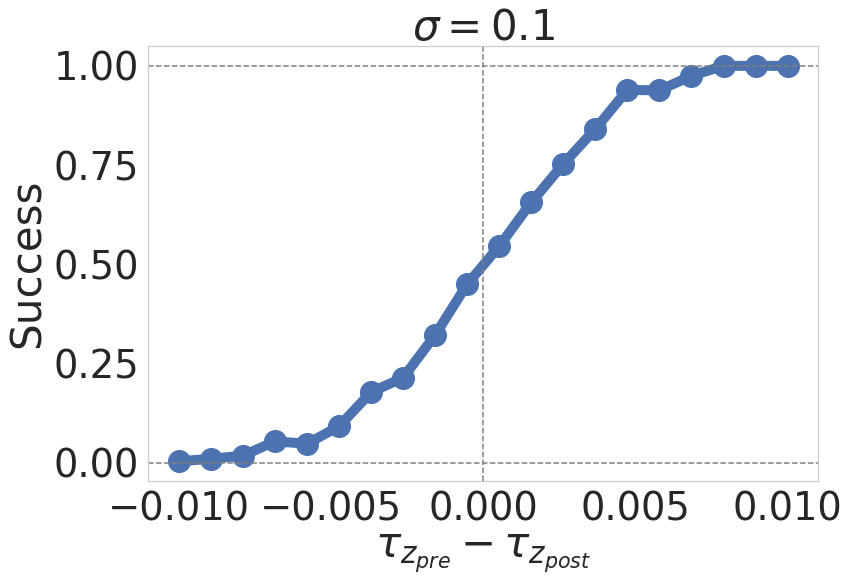

In [11]:
average_result = np.nanmean(results, axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(asymmetries, average_result, 'o-', ms=ms, lw=lw)

ax.set_title(r'$\sigma = $' + str(sigma_out))
ax.set_xlabel(r'$\tau_{z_{pre}} - \tau_{z_{post}}$')
ax.set_ylabel('Success')

ax.axhline(0, ls='--', color='gray')
ax.axhline(1, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray'); 

### Systematic asymmetry different levels of noise

In [12]:
%%time
training_time = 0.100
ipi = 0.0
sigma_out = 0.1
n_samples = 1000
sigma_set = [0.05, 0.1, 0.150]
asymmetry = -0.010
n_asymmetry = 25
asymmetries = np.linspace(-0.010, 0.010, num=n_asymmetry)

results_dictionary = {}
for sigma_out in sigma_set:
    print(sigma_out)
    results = np.zeros((n_samples, n_asymmetry))
    for as_index, asymmetry in enumerate(asymmetries):
        tau_z_pre = 0.025 + asymmetry * 0.5
        tau_z_post = 0.025 - asymmetry * 0.5
        for sample_index in range(n_samples):
            aux = return_ending_side(tau_z_pre=tau_z_pre, tau_z_post=tau_z_post, tt=training_time, ipi=ipi, sigma_out=sigma_out)
            result, manager, pattern_sequence = aux
            results[sample_index, as_index] = result
            
    results_dictionary[sigma_out] = np.copy(results)

0.05
0.1
0.15
CPU times: user 1h 26min 53s, sys: 984 ms, total: 1h 26min 54s
Wall time: 1h 26min 53s


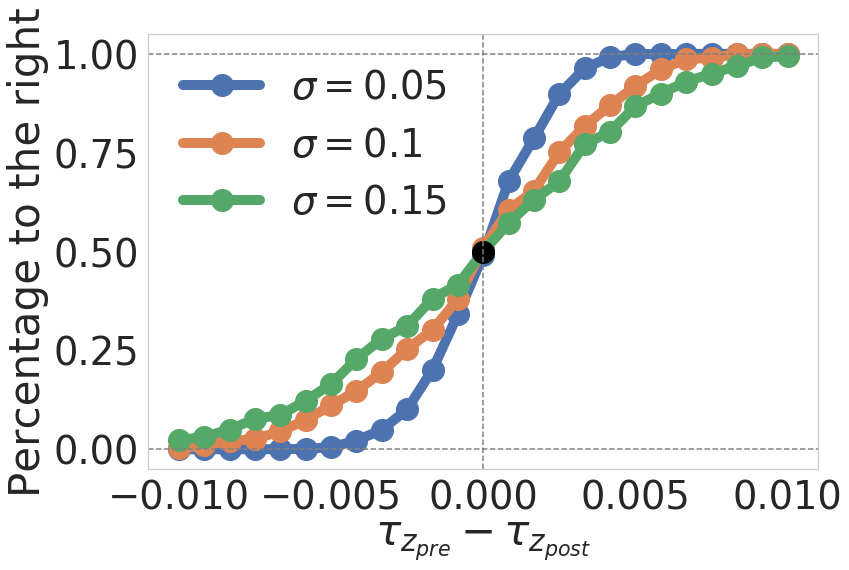

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

for index, sigma in enumerate(sigma_set): 
    results = results_dictionary[sigma]

    average_result = np.nanmean(results, axis=0)
    ax.plot(asymmetries, average_result, 'o-',  color=colors[index], ms=ms, lw=lw, label=r'$\sigma = $' + str(sigma))


ax.set_xlabel(r'$\tau_{z_{pre}} - \tau_{z_{post}}$')
ax.set_ylabel('Percentage to the right')

ax.legend(frameon=False)


ax.plot(0, 0.5, 'o', color='black', ms=ms)
ax.axhline(0, ls='--', color='gray')
ax.axhline(1, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray'); 

# Graph

## Let's get to examples of going right and going left

In [14]:
strict_maximum = True

g_a = 2.0
g_I = 2.0
tau_a = 0.250
G = 1.0
sigma_out = 0.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.025

hypercolumns = 1
minicolumns = 11
n_patterns = 11

# Training protocol
training_times_base = 0.100
training_times = [training_times_base for i in range(n_patterns)]
ipi_base = 0.00
inter_pulse_intervals = [ipi_base for i in range(n_patterns)]
inter_sequence_interval = 0.0
resting_time = 0.0
epochs = 1

# Manager properties
values_to_save = ['o']

# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
                 tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
                 strict_maximum=strict_maximum, perfect=False, normalized_currents=True)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)
# Build the representation
representation = PatternsRepresentation(manager.canonical_activity_representation[:n_patterns],
                                        minicolumns=minicolumns)

# Build the protocol
protocol = Protocol()
protocol.simple_protocol(representation, training_times=training_times, inter_pulse_intervals=inter_pulse_intervals,
                    inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

# Run the protocol
timed_input = manager.run_network_protocol_offline(protocol=protocol)

T_persistence = 0.100
manager.set_persistent_time_with_adaptation_gain(T_persistence=T_persistence)

T_cue = tau_s
T_recall = T_persistence * (n_patterns / 2.0) + 0.3 * T_persistence
nr = manager.canonical_network_representation
manager.run_network_recall(I_cue=nr[5], T_cue=T_cue, T_recall=T_recall, reset=True, empty_history=True)
o1 = manager.history['o']

Text(0.5,0,'Time (s)')

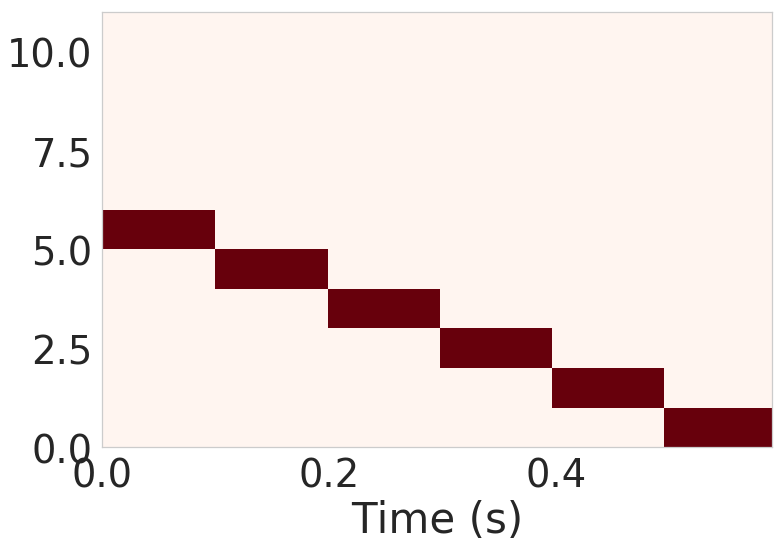

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

cmap = matplotlib.cm.Reds
extent = [0, manager.T_recall_total, 0, minicolumns]
ax.imshow(o1.T, cmap=cmap, origin='lower', aspect='auto', extent=extent)
ax.set_xlabel('Time (s)')

In [16]:
strict_maximum = True

g_a = 2.0
g_I = 2.0
tau_a = 0.250
G = 1.0
sigma_out = 0.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.005

hypercolumns = 1
minicolumns = 11
n_patterns = 11

# Training protocol
training_times_base = 0.100
training_times = [training_times_base for i in range(n_patterns)]
ipi_base = 0.00
inter_pulse_intervals = [ipi_base for i in range(n_patterns)]
inter_sequence_interval = 0.0
resting_time = 0.0
epochs = 1

# Manager properties
values_to_save = ['o']

# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
                 tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
                 strict_maximum=strict_maximum, perfect=False, normalized_currents=True)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)
# Build the representation
representation = PatternsRepresentation(manager.canonical_activity_representation[:n_patterns],
                                        minicolumns=minicolumns)

# Build the protocol
protocol = Protocol()
protocol.simple_protocol(representation, training_times=training_times, inter_pulse_intervals=inter_pulse_intervals,
                    inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

# Run the protocol
timed_input = manager.run_network_protocol_offline(protocol=protocol)

T_persistence = 0.100
manager.set_persistent_time_with_adaptation_gain(T_persistence=T_persistence)

T_cue = tau_s
T_recall = T_persistence * (n_patterns / 2.0) + 0.3 * T_persistence
nr = manager.canonical_network_representation
manager.run_network_recall(I_cue=nr[5], T_cue=T_cue, T_recall=T_recall, reset=True, empty_history=True)
o2 = manager.history['o']

Text(0.5,0,'Time (s)')

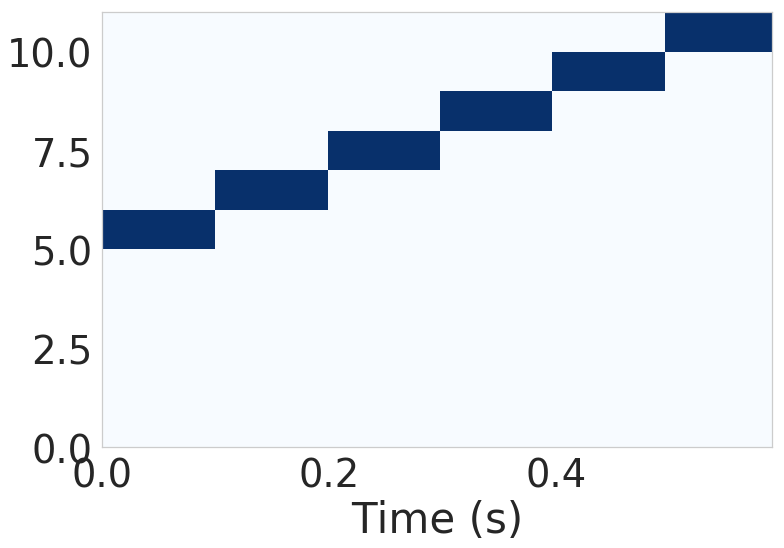

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

cmap = matplotlib.cm.binary
cmap = matplotlib.cm.Blues
extent = [0, manager.T_recall_total, 0, minicolumns]
ax.imshow(o2.T, cmap=cmap, origin='lower', aspect='auto', extent=extent)
ax.set_xlabel('Time (s)')

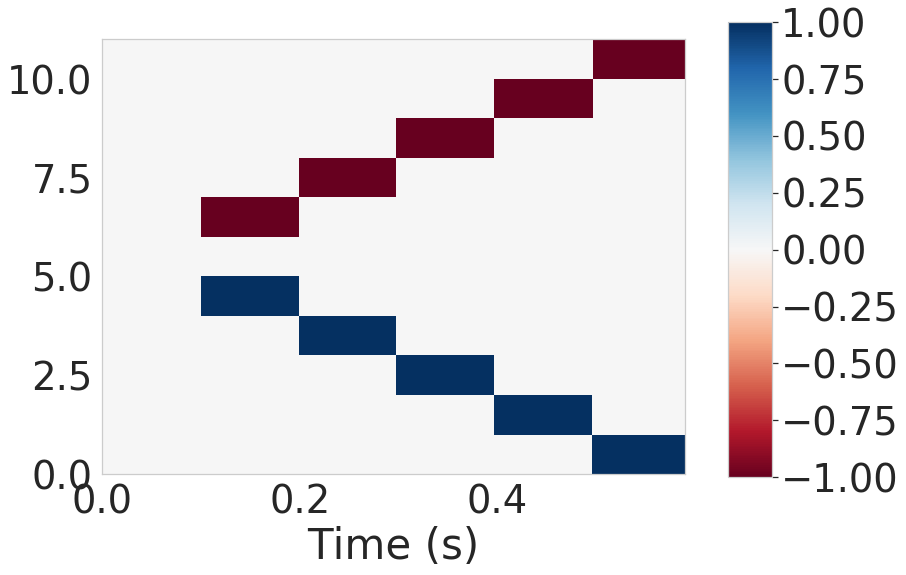

In [18]:
value = 1.5
data = (o1.T + (-1 ) * o2.T)
masked_array = np.ma.masked_where(data >  value, data)

cmap = matplotlib.cm.RdBu  # Can be any colormap that you want after the cm
cmap.set_bad(color='black')

fig = plt.figure()
ax = fig.add_subplot(111)

extent = [0, manager.T_recall_total, 0, minicolumns]
im = ax.imshow(masked_array, cmap=cmap, origin='lower', aspect='auto', extent=extent)
ax.set_xlabel('Time (s)')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.12, 0.05, 0.79])
fig.colorbar(im, cax=cbar_ax, cmap=cmap, spacing='proportional')

## Plot and save

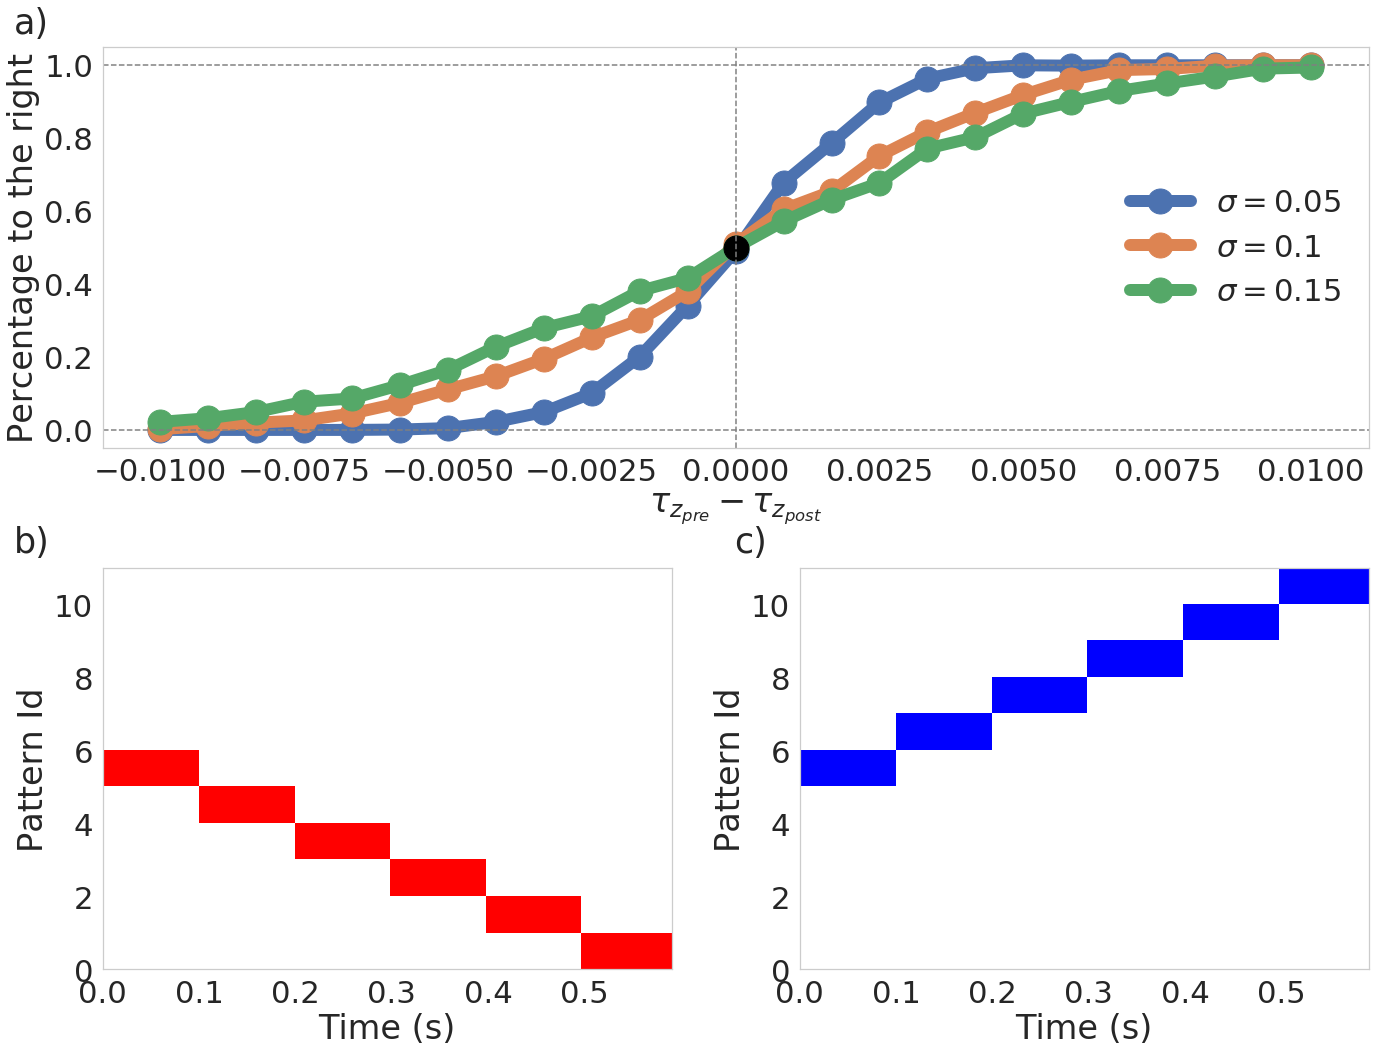

In [19]:
lw = 12
ms = 25

sns.set(font_scale=2.8)
sns.set_style("whitegrid", {'axes.grid': False})


save = True
legend = False
symbols_in_imshow = True
captions = True

factor_scale = 1.3
s1 = int(16 * factor_scale)
s2 = int(12 * factor_scale)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(s1, s2))

# The characterisation
ax = fig.add_subplot(gs[0, :])

for index, sigma in enumerate(sigma_set): 
    results = results_dictionary[sigma]

    average_result = np.nanmean(results, axis=0)
    ax.plot(asymmetries, average_result, 'o-',  color=colors[index], ms=ms, lw=lw, label=r'$\sigma = $' + str(sigma))


ax.set_xlabel(r'$\tau_{z_{pre}} - \tau_{z_{post}}$')
ax.set_ylabel('Percentage to the right')

ax.legend(frameon=False)


ax.plot(0, 0.5, 'o', color='black', ms=ms)
ax.axhline(0, ls='--', color='gray')
ax.axhline(1, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

###############333
# Going backwards example
#################

ax = fig.add_subplot(gs[1, 1])
cmap = matplotlib.cm.Blues
cmap.set_under(color='white')
cmap.set_over(color='blue')

extent = [0, manager.T_recall_total, 0, minicolumns]
ax.imshow(o2.T, cmap=cmap, origin='lower', aspect='auto', extent=extent, vmin=0.1, vmax=0.5)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pattern Id')


###############33
# Moving forward
###########33
extent = [0, manager.T_recall_total, 0, minicolumns]



ax = fig.add_subplot(gs[1, 0])
cmap = matplotlib.cm.Reds
cmap.set_under(color='white')
cmap.set_over(color='red')

extent = [0, manager.T_recall_total, 0, minicolumns]
ax.imshow(o1.T, cmap=cmap, origin='lower', aspect='auto', extent=extent, vmin=0.1, vmax=0.5)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pattern Id')

fig.tight_layout()


###############
# Captions
###############
if captions:
    size = 35
    y2_value = 0.49
    x1_value = 0.03
    x2_value = 0.53
    fig.text(x1_value, 0.97, 'a)', size=size)
    fig.text(x1_value , y2_value, 'b)', size=size)
    fig.text(x2_value, y2_value, 'c)', size=size)


    
if save:
    directory = '../plot_producers/'
    file_name = 'asymmetry'
    format_string = '.pdf'
    string_to_save = directory + file_name + format_string
    fig.savefig(string_to_save, frameon=False, dpi=110, bbox_inches='tight')